In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

### Рассматриваю __показательное__ распределение случайной величины с параметром $\lambda= 1$

https://ru.wikipedia.org/wiki/Экспоненциальное_распределение

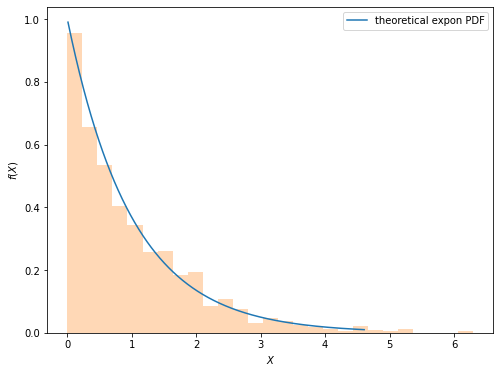

In [2]:
# Генерируем выборку размером в 1000 элементов, расчитываем теоретическую плотность распределения,
# строим теоретическую оценку плотности показательного распределения и добавляем гистограмму выборки 


size = 1000

r_sample = sts.expon.rvs(size=size)
x = np.linspace(sts.expon.ppf(0.01), sts.expon.ppf(0.99), size)

_, ax = plt.subplots(figsize=(8,6))

ax.plot(x, sts.expon.pdf(x), label='theoretical expon PDF')
ax.hist(r_sample, bins='auto', density=True, histtype='stepfilled', alpha=0.3)

plt.ylabel('$f(X)$')
plt.xlabel('$X$')
ax.legend(loc='best')

plt.show()

__Вывод__: гистограмма выборки хорошо совпадает с графиком теоретической оценки плотности показательного распределения

### Распределение выборочного средних показательного распределения при $\lambda= 1$, будет приближатся к такому нормальному распределению $N\left(1, \frac{1}{n}\right)$

In [3]:
# Создаём распределение выборочного среднего нашей случайной величины при разных объёмах выборок и на этих выборочных средних 
# строим гистограмму, затем подсчёт значения параметров нормальных распределений и в конце строим теоретическую оценку 
# плотности показательного распределения


def distribution_estimate():
    for n in [5, 10, 50, 500]:
        sample_mean = []
        for _ in range(1000):
            r_sample = sts.expon.rvs(size=n)
            sample_mean.append(np.mean(r_sample, dtype=np.float32))
        
        # Подсчёт значения параметров нормальных распределений, зная теоретическое среднее и дисперсию моей случ. величины
        m_u, sigma = 1, np.power((1./n), 0.5)
        
        fig, ax = plt.subplots(figsize=(8,6))

        ax.plot(x, sts.norm.pdf(x, loc=m_u, scale=sigma), label='theoretical norm PDF')
        ax.hist(sample_mean, bins=13, density=True, histtype='stepfilled', color='yellow', alpha=0.3)
        
        ax.set_title(f"n = {str(n)}", {'size': 20})
        ax.set_ylabel('$f(\widehat{X})$', {'size': 15})
        ax.set_xlabel('$\widehat{X}$', {'size': 15})
        ax.legend(loc='best')
        ax.set_facecolor('black')
        fig.set_figwidth(14)

        plt.show()

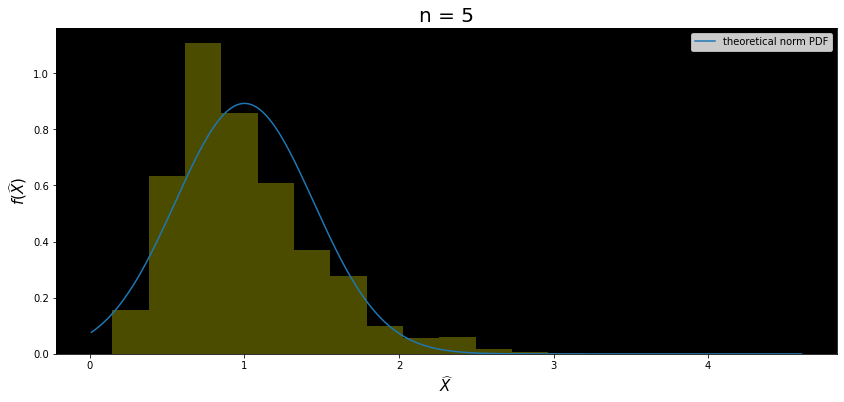

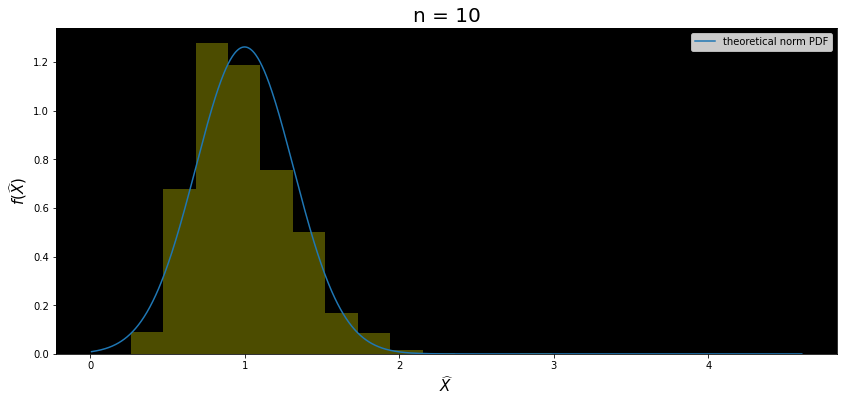

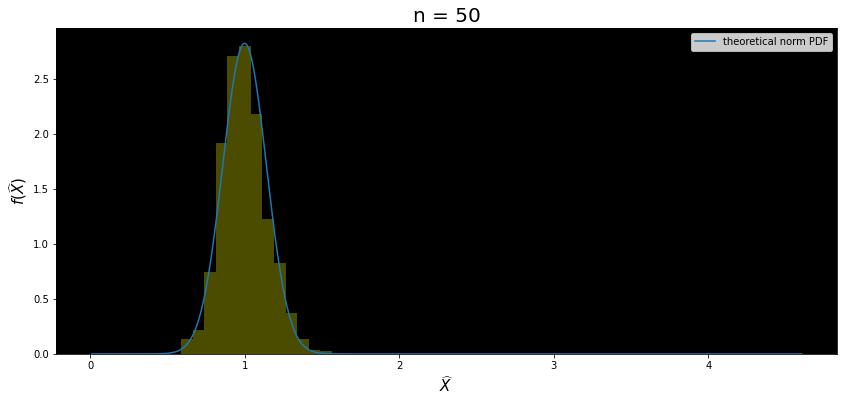

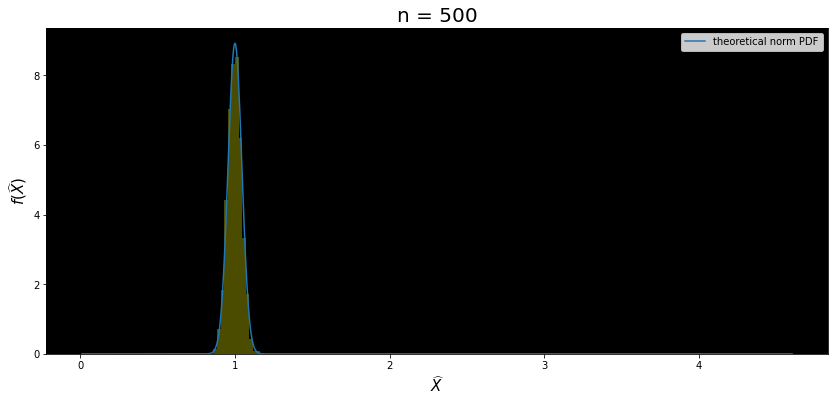

In [4]:
distribution_estimate()

__Вывод__: чем больше n (объем выборки), тем лучше распределение выборочных средних показательного распределения соответствует 
приближающему его нормальному распределению.